# HR Analytics and Visualization: Python and SQL

In [1]:
import numpy as np 
import pandas as pd
import sqlite3
import seaborn as sns 
from sqlalchemy import create_engine
import warnings 
import os
import matplotlib.pyplot as plt

# Our Data: At A Glance

In [2]:
warnings.filterwarnings('ignore')
hr = pd.read_csv(r'./HR_Analytics/HR-Employee-Attrition.csv')
hr.head() 

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# All possible values (both numerical or categorical) for each column in the dataframe.

print(hr.apply(lambda col: col.unique())) 
    # (alternative code, same result): pd.Series({col:df[col].unique() for col in df})

Age                         [41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2...
Attrition                                                           [Yes, No]
BusinessTravel                 [Travel_Rarely, Travel_Frequently, Non-Travel]
DailyRate                   [1102, 279, 1373, 1392, 591, 1005, 1324, 1358,...
Department                   [Sales, Research & Development, Human Resources]
DistanceFromHome            [1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5...
Education                                                     [2, 1, 4, 3, 5]
EducationField              [Life Sciences, Other, Medical, Marketing, Tec...
EmployeeCount                                                             [1]
EmployeeNumber              [1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,...
EnvironmentSatisfaction                                          [2, 3, 4, 1]
Gender                                                         [Female, Male]
HourlyRate                  [94, 61, 92, 56, 40, 79, 81, 67, 44,

# Categorical Data

In [4]:
hr_cat = hr.select_dtypes(include=['object'])
hr_cat.apply(lambda col: col.unique())

Attrition                                                 [Yes, No]
BusinessTravel       [Travel_Rarely, Travel_Frequently, Non-Travel]
Department         [Sales, Research & Development, Human Resources]
EducationField    [Life Sciences, Other, Medical, Marketing, Tec...
Gender                                               [Female, Male]
JobRole           [Sales Executive, Research Scientist, Laborato...
MaritalStatus                           [Single, Married, Divorced]
Over18                                                          [Y]
OverTime                                                  [Yes, No]
dtype: object

# Numerical Data

In [5]:
hr_num = hr.select_dtypes(exclude=['object'])
hr_num.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Factorizing All Categorical Data for Correlation

In [6]:
hr_cat = hr.select_dtypes(include=['object'])
hrf = hr_cat.apply(lambda x: pd.factorize(x)[0])
hr_merged = hrf.join(hr_num, how='outer')
hr_merged
hr_minus_JS = hr_merged.drop(columns=['JobSatisfaction'])
mer = hr_minus_JS.corrwith(hr_merged['JobSatisfaction'])
mer = mer.drop(labels=['EmployeeNumber','StandardHours','Over18', 'EmployeeCount'], axis=0)
normalized_hr = (mer - mer.min())/(mer.max() - mer.min())
normalized_hr = pd.DataFrame(normalized_hr, columns=['Correlation'])
normalized_hr

,Correlation
Attrition,1.000000
BusinessTravel,0.602330
Department,0.287925
EducationField,0.091342
Gender,0.598266
JobRole,0.269294
MaritalStatus,0.268710
OverTime,0.267683
Age,0.380073
DailyRate,0.582932


# Comparing Correlation Methods

In [7]:
from scipy.stats import kendalltau, pearsonr, spearmanr

def kendall_pval(x,y):
    return kendalltau(x,y)[1]

def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]

def spearmanr_pval(x,y):
    return spearmanr(x,y)[1]

corrk = hr_minus_JS.corrwith(hr_merged['JobSatisfaction'],method=kendall_pval)
corrk = pd.DataFrame(corrk.dropna(), columns=['X'])
corrp = hr_minus_JS.corrwith(hr_merged['JobSatisfaction'],method=pearsonr_pval)
corrp = pd.DataFrame(corrp.dropna(), columns=['Y'])
corrs = hr_minus_JS.corrwith(hr_merged['JobSatisfaction'],method=spearmanr_pval)
corrs = pd.DataFrame(corrs.dropna(), columns=['Z'])
corr = corrk.merge(corrp, left_index=True, right_index=True)
corr = corr.merge(corrs, left_index=True, right_index=True)
corr

,X,Y,Z
Attrition,0.000080,0.000070,0.000077
BusinessTravel,0.207622,0.193123,0.205588
Department,0.405919,0.421057,0.407508
EducationField,0.027914,0.033786,0.027974
Gender,0.172097,0.202608,0.172179
JobRole,0.268808,0.352679,0.270520
MaritalStatus,0.342048,0.350655,0.343969
OverTime,0.274314,0.347115,0.274461
Age,0.843277,0.851348,0.842558
DailyRate,0.295273,0.241443,0.286302


# SQL Query: Correlation Threshold

In [8]:
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)
corr.to_sql('corr', con = engine)

sql = ''' SELECT *
from corr
WHERE X AND Y AND Z > 0.5
''';

df_sql = pd.read_sql_query(sql,con=engine)
df_sql

,index,X,Y,Z
0,Age,0.843277,0.851348,0.842558
1,DistanceFromHome,0.615084,0.888228,0.616361
2,Education,0.844502,0.665200,0.842839
3,EnvironmentSatisfaction,0.906704,0.794943,0.908724
4,JobInvolvement,0.641721,0.410626,0.641652
5,JobLevel,0.976282,0.940645,0.973964
6,MonthlyIncome,0.845448,0.783959,0.851681
7,MonthlyRate,0.906736,0.980320,0.917568
8,PerformanceRating,0.789108,0.929876,0.789211
9,RelationshipSatisfaction,0.576466,0.633298,0.573887


# Quick Correlation Stats with SQL

In [9]:
sql = '''
SELECT 'X' AS 'Method',
    sum(X) as 'Total',
    avg(X) as 'Average',
    min(X) as 'Minimum',
    max(X) as 'Maximum'
FROM corr
UNION
SELECT 'Y',
    sum(Y),
    avg(Y),
    min(Y),
    max(Y)
FROM corr
UNION
SELECT 'Z',
    sum(Z),
    avg(Z),
    min(Z),
    max(Z)
FROM corr
''';

df_sql = pd.read_sql_query(sql,con=engine)
df_sql

,Method,Total,Average,Minimum,Maximum
0,X,15.417306,0.497332,0.000080,0.983748
1,Y,15.570388,0.502271,0.000070,0.980320
2,Z,15.425210,0.497587,0.000077,0.983768


# Correlation Map for All Values

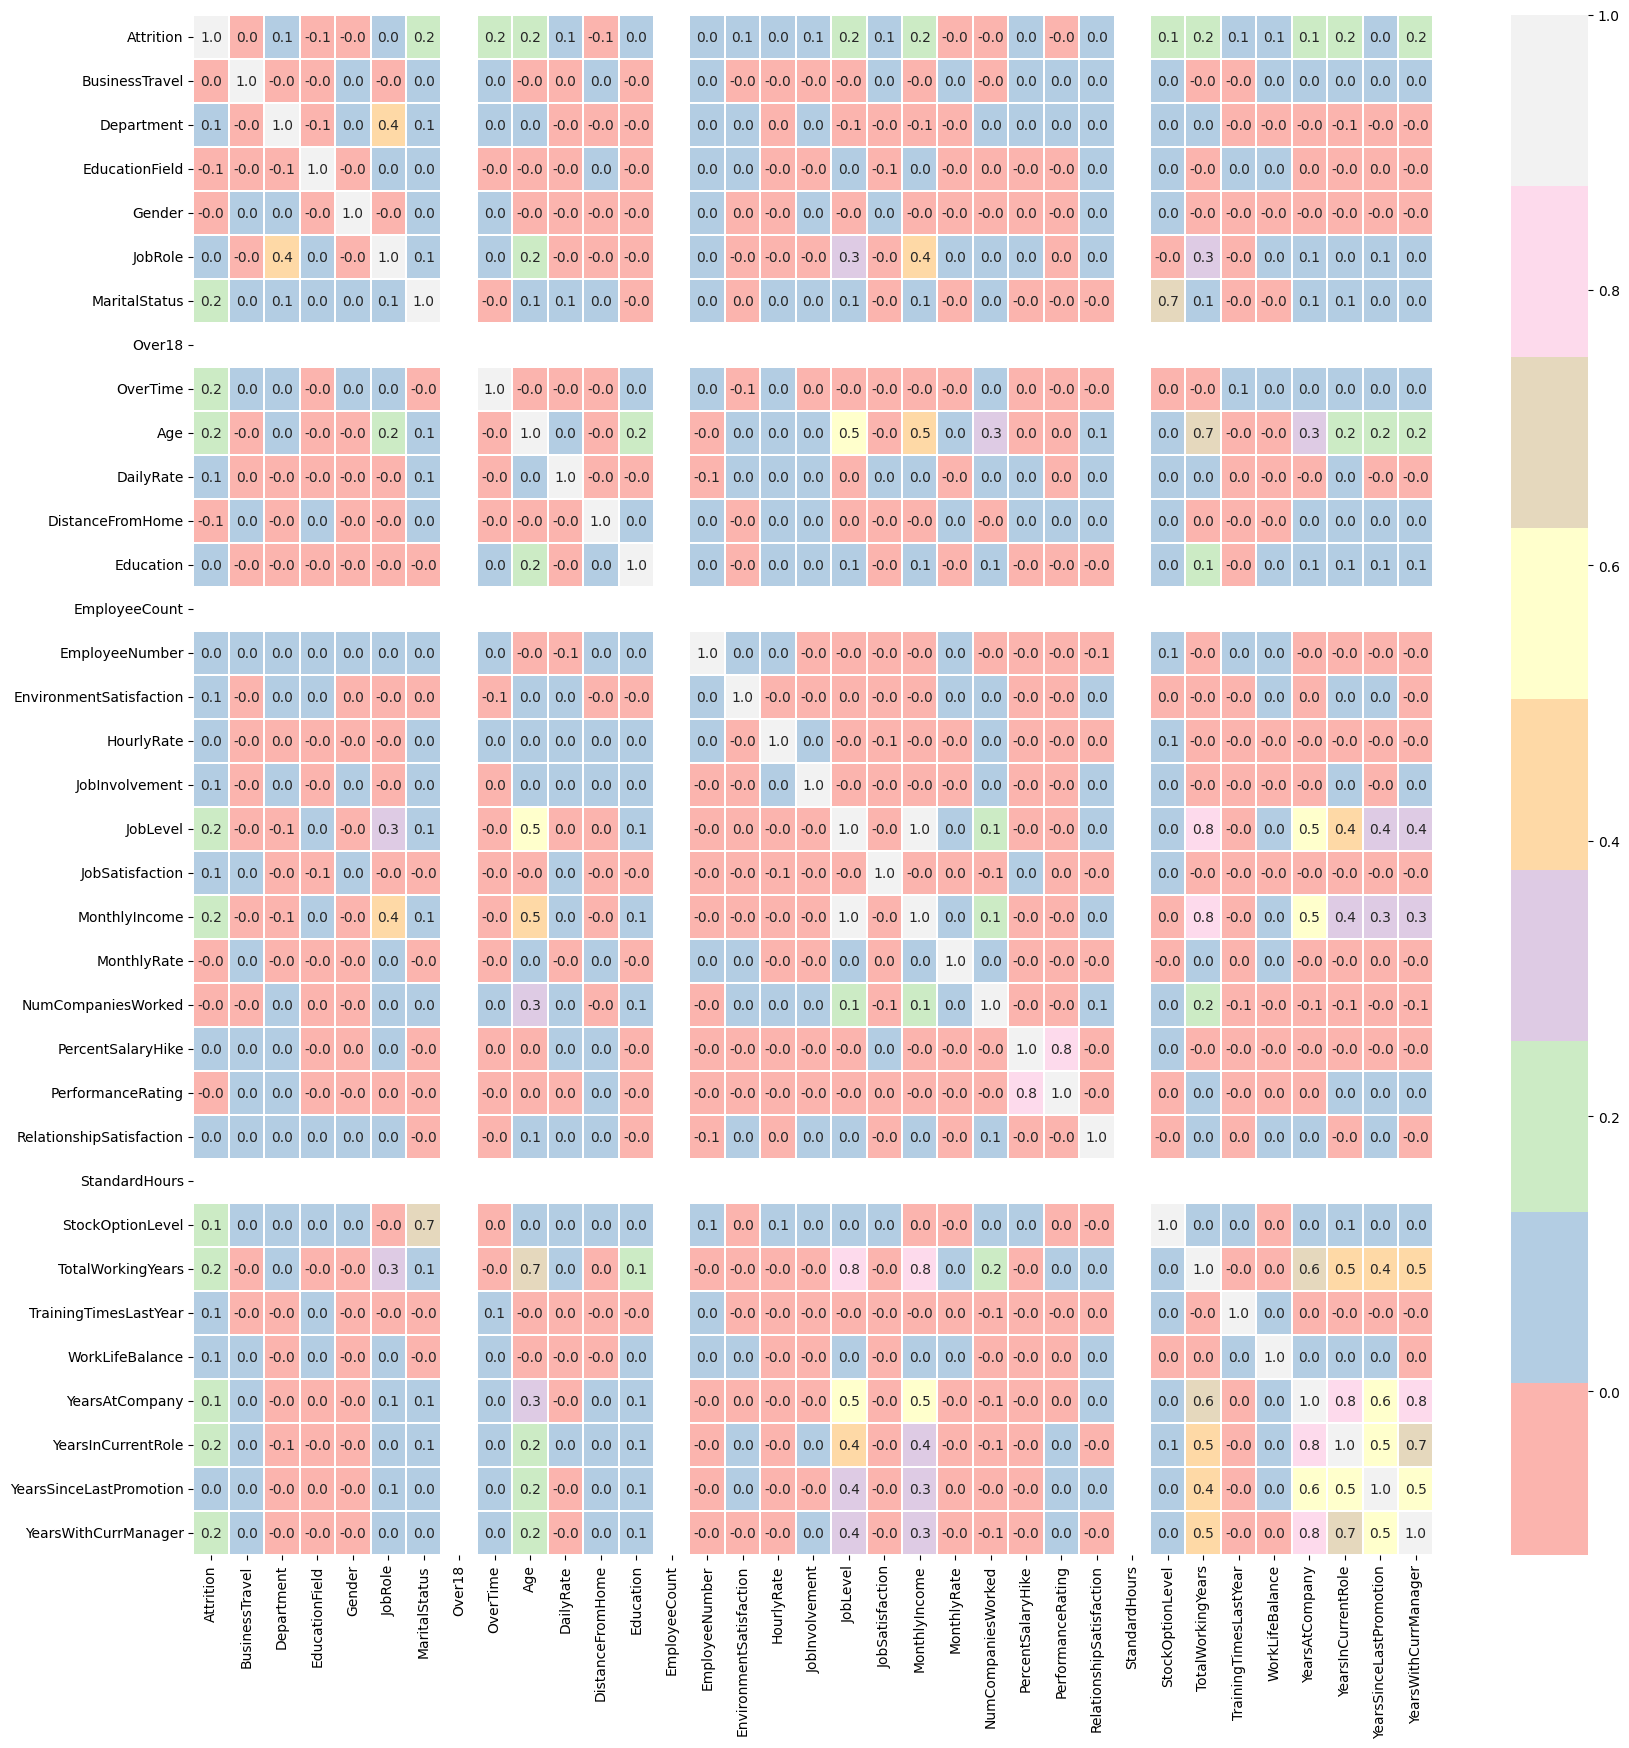

In [10]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(hr_merged.corr(), cmap = 'Pastel1', annot=True, linewidths=.1, fmt= '.1f',ax=ax)
plt.show()

# Correlation Map for Numerical Values:

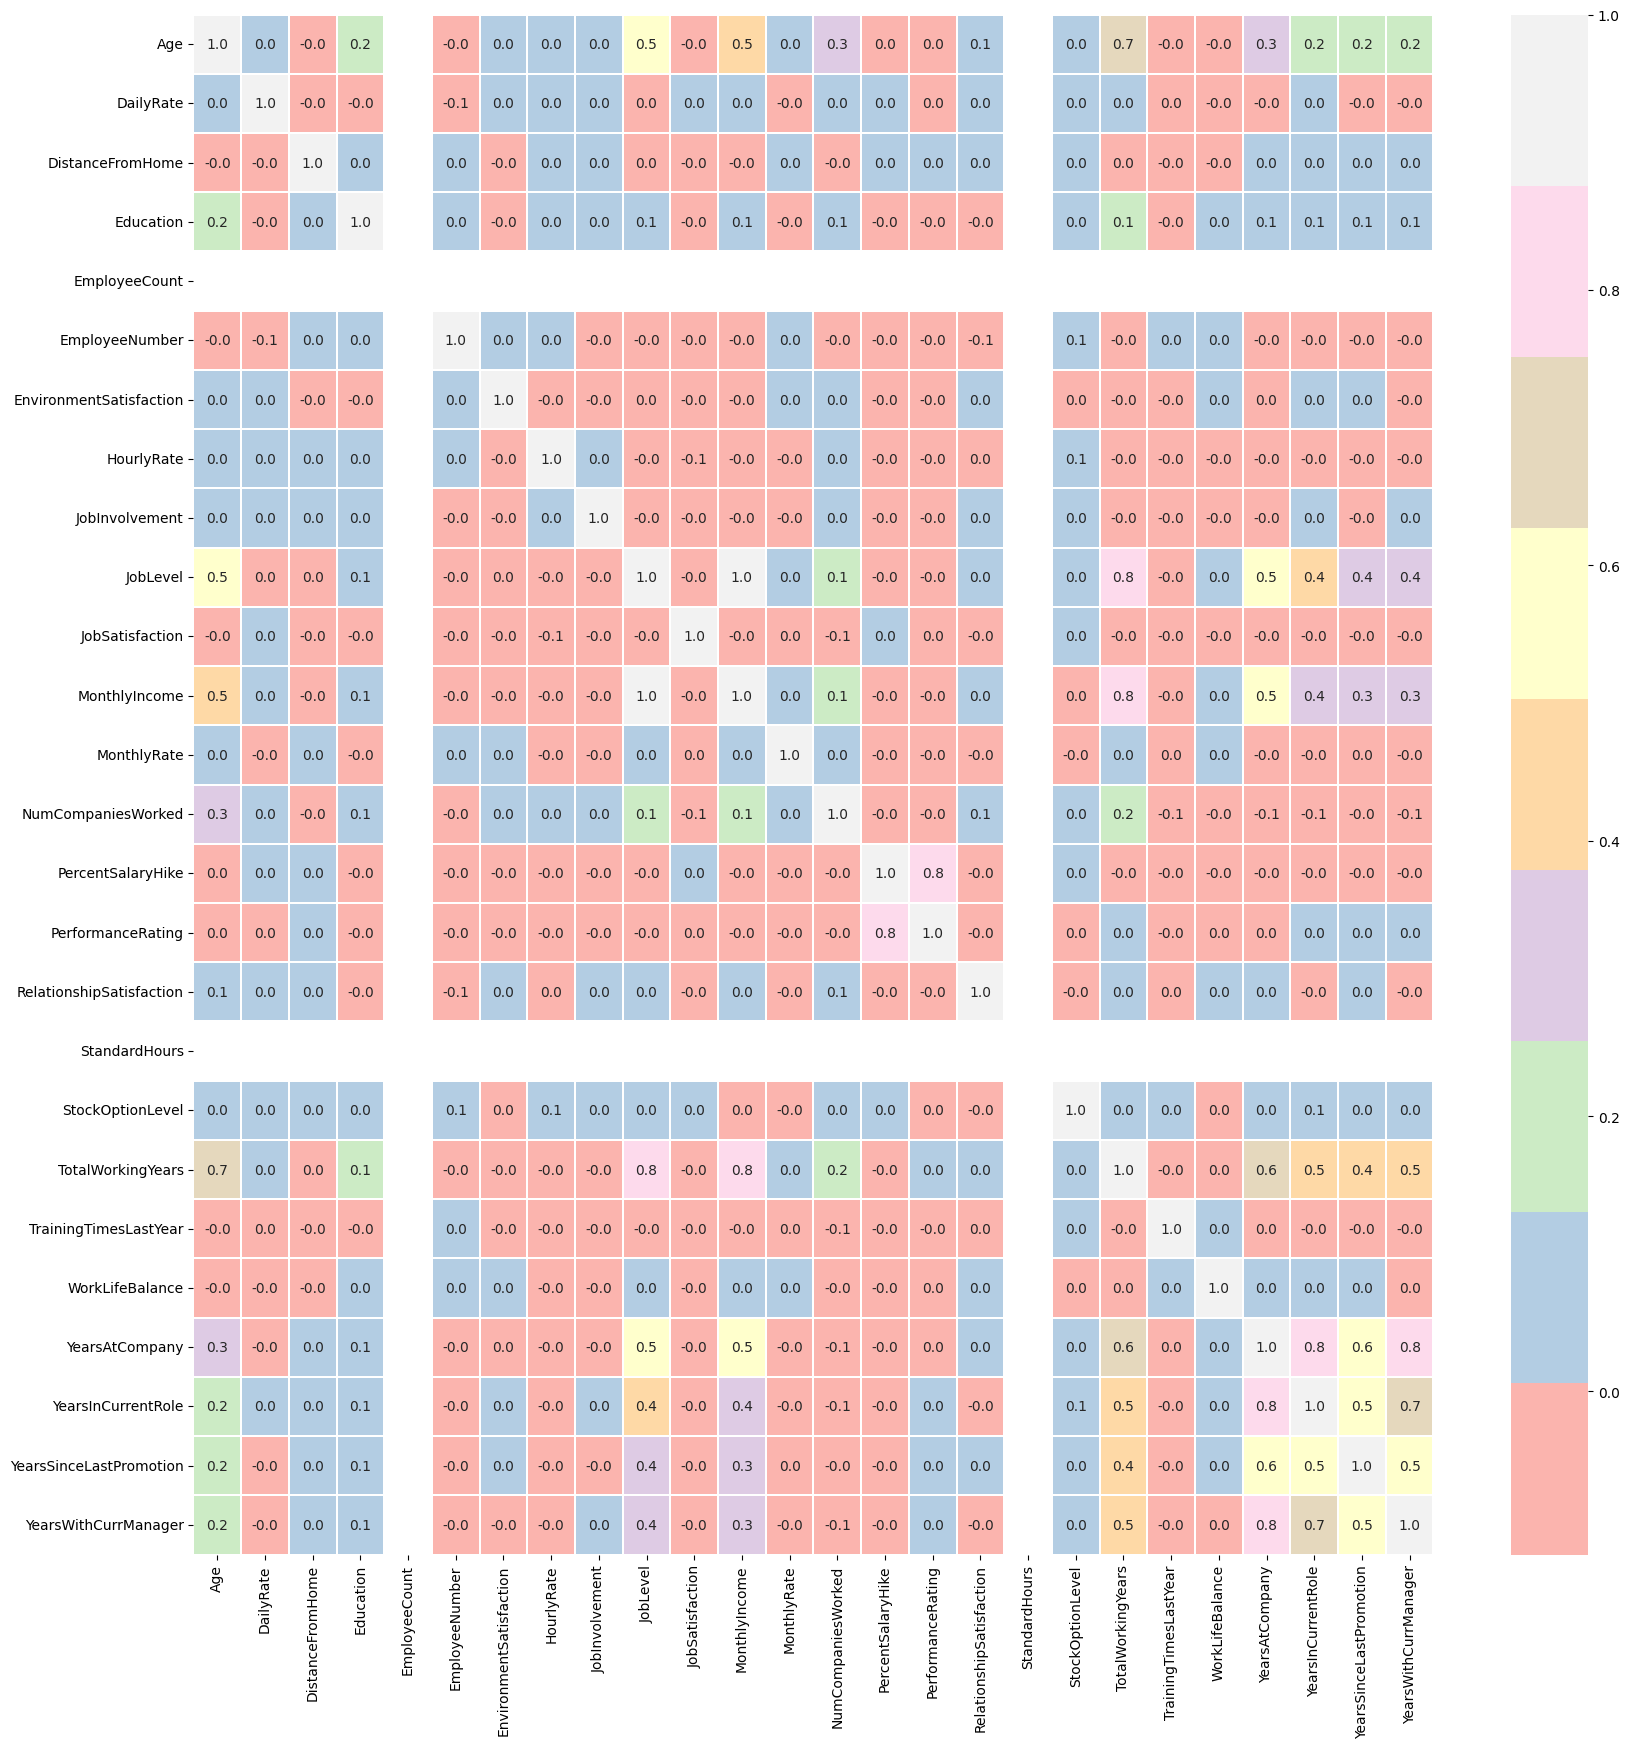

In [11]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(hr_num.corr(), cmap = 'Pastel1', annot=True, linewidths=.1, fmt= '.1f',ax=ax)
plt.show()

# Overtime (by Attrition)

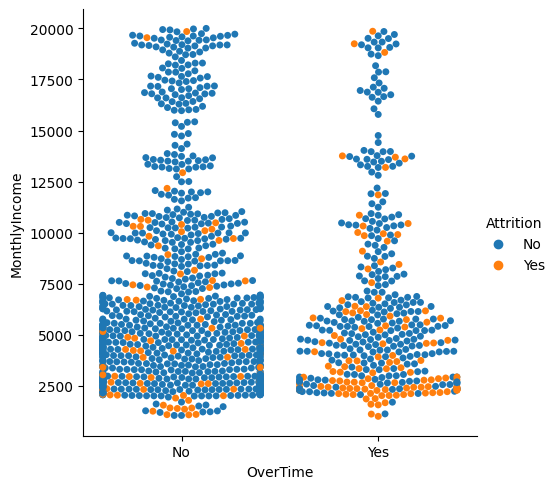

In [12]:
sns.catplot(data=hr.sort_values('OverTime'),
    x='OverTime', y='MonthlyIncome', hue='Attrition', kind='swarm')

# Monthly Income vs Job Level (by Marital Status)

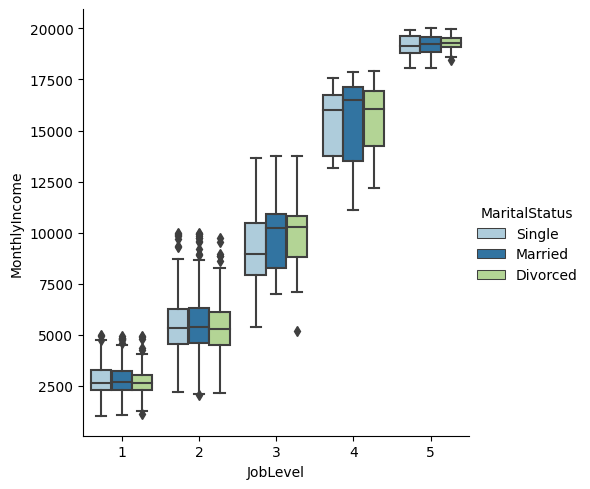

In [13]:
sns.catplot(data=hr,x='JobLevel',y='MonthlyIncome',hue='MaritalStatus',kind='box',palette='Paired')

# Years In Current Role vs Monthly Income

<Axes: xlabel='YearsInCurrentRole', ylabel='MonthlyIncome'>

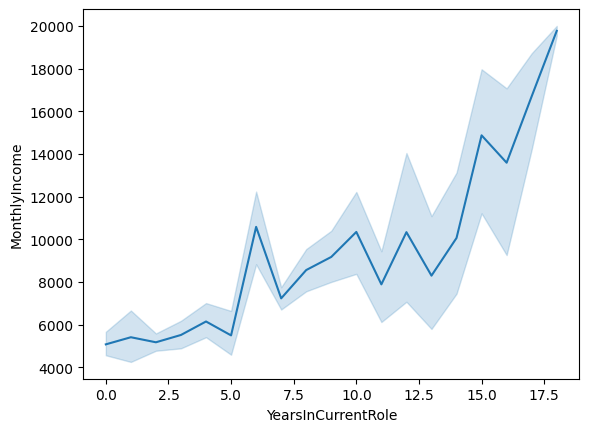

In [14]:
sns.lineplot(data=hr, x='YearsInCurrentRole', y='MonthlyIncome')

# Job Satisfaction (by Attrition)

<Axes: xlabel='JobSatisfaction', ylabel='count'>

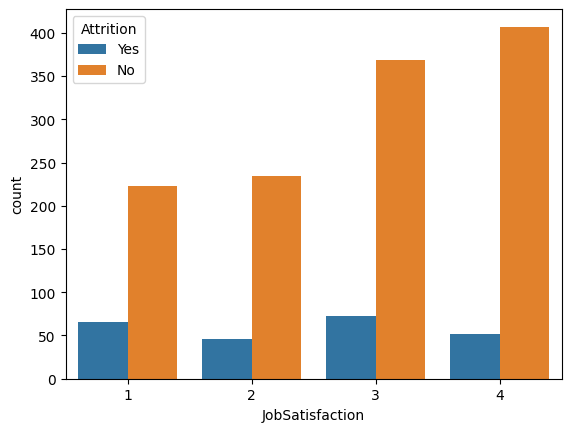

In [15]:
sns.countplot(hr, x='JobSatisfaction', hue='Attrition')

# Performance Rating vs Salary Hikes (by Gender)

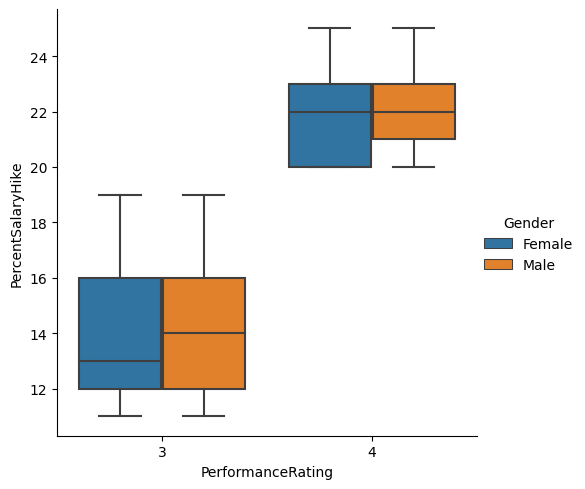

In [16]:
sns.catplot(data=hr, x='PerformanceRating', y='PercentSalaryHike', hue='Gender', kind='box')

# Education Level vs Job Role (by Gender)

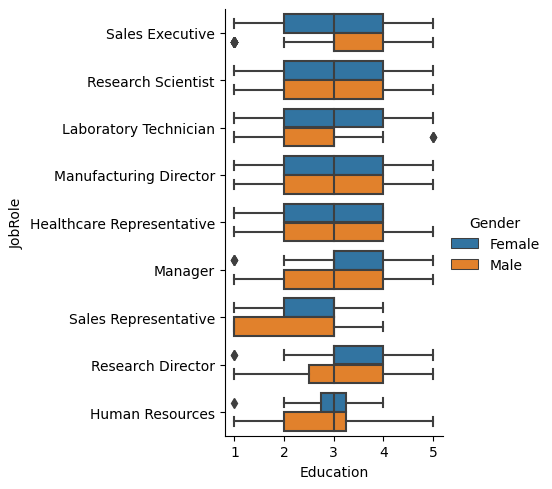

In [17]:
sns.catplot(data=hr, x='Education', y='JobRole', hue='Gender', kind='box')

# Distributions by:
- Age
- Percent Salary Hike
- Years in Current Role 
- Years Since Last Promotion

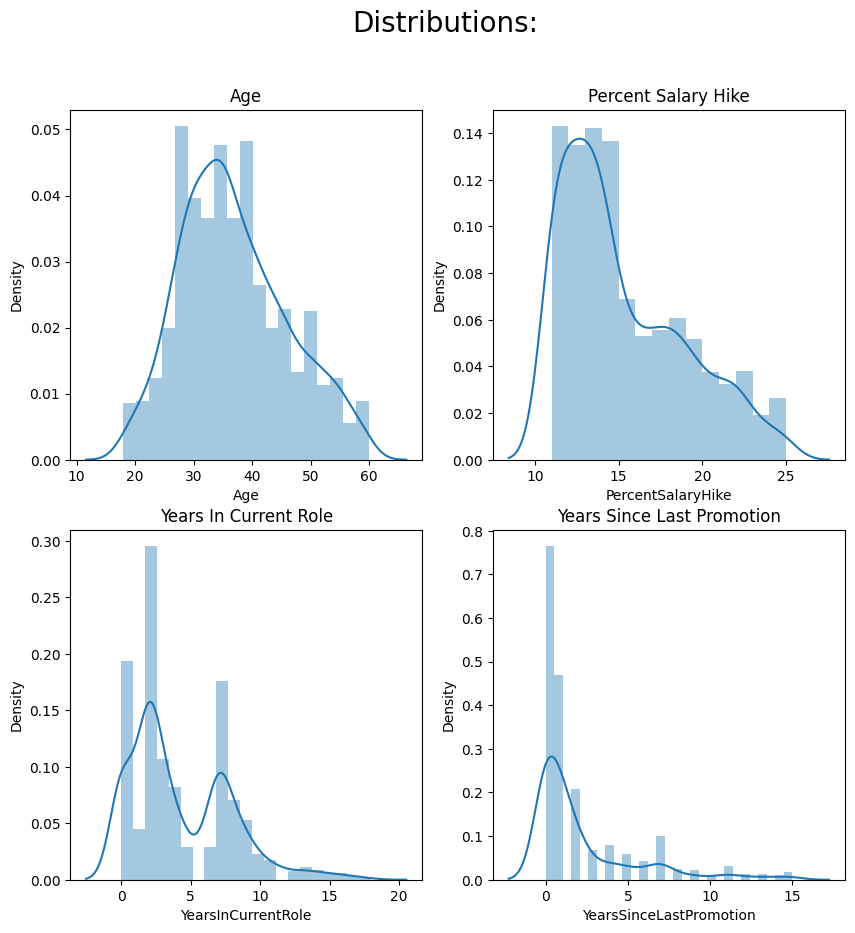

In [18]:
fig,ax = plt.subplots(2,2, figsize=(10,10))             
plt.suptitle('Distributions:', fontsize=20)
sns.distplot(hr['Age'], ax = ax[0,0])  
ax[0][0].set_title('Age')
sns.distplot(hr['PercentSalaryHike'], ax = ax[0,1]) 
ax[0][1].set_title('Percent Salary Hike')
sns.distplot(hr['YearsInCurrentRole'], ax = ax[1,0]) 
ax[1][0].set_title('Years In Current Role')
sns.distplot(hr['YearsSinceLastPromotion'], ax = ax[1,1]) 
ax[1][1].set_title('Years Since Last Promotion')
plt.show()                                                

# Attrition vs Years Since Last Promotion (by Gender)

<Axes: xlabel='Attrition', ylabel='YearsSinceLastPromotion'>

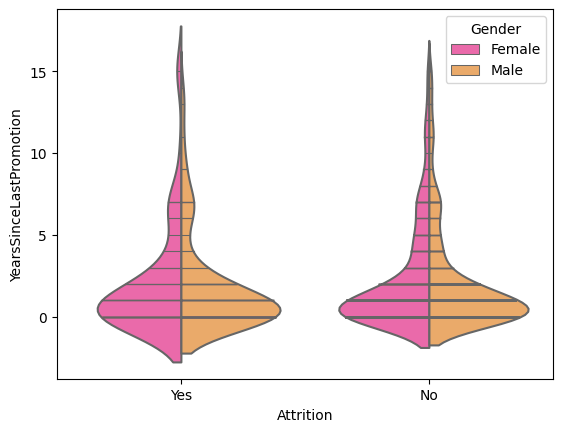

In [19]:
sns.violinplot(x='Attrition', y='YearsSinceLastPromotion', hue='Gender', data=hr, palette='spring', split=True,
               inner='stick')

# Job Satisfaction vs Monthly Income (by Job Level)

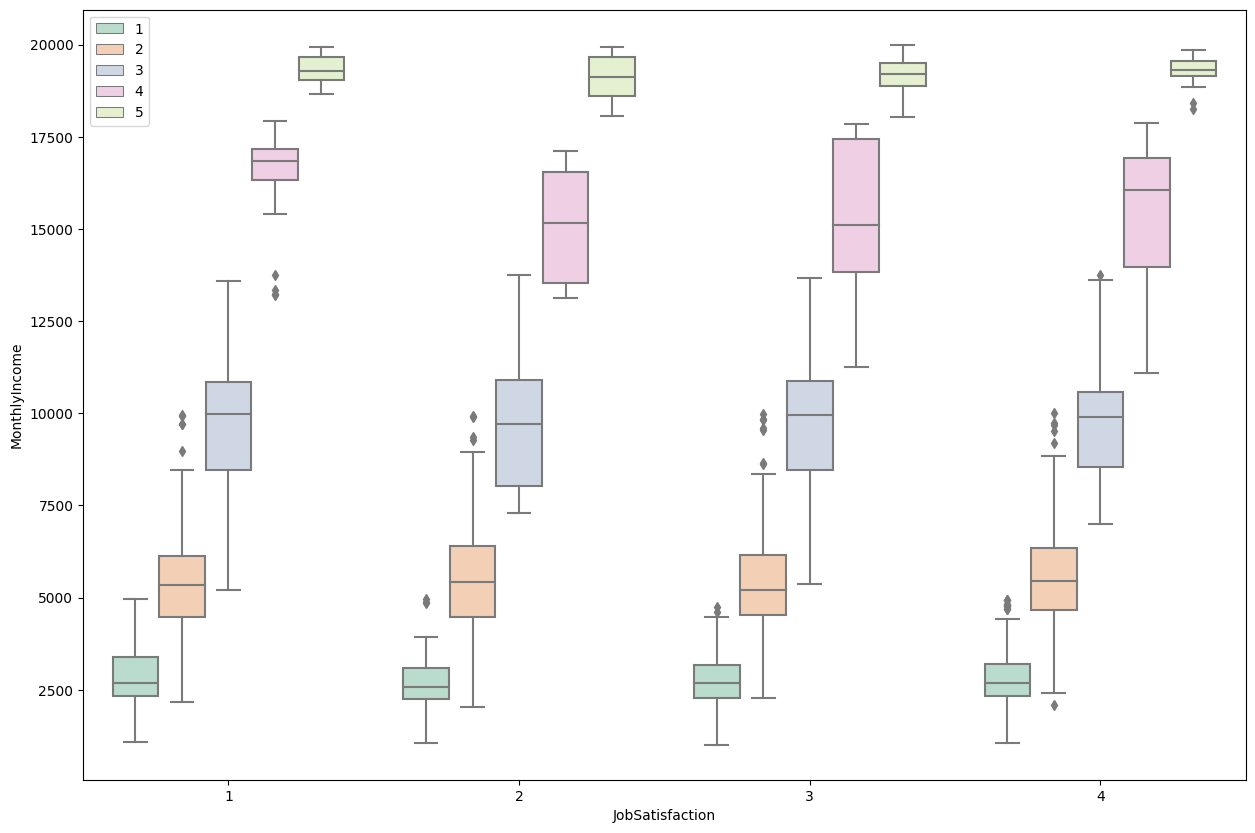

In [20]:
f,ax = plt.subplots(figsize=(15,10))
sns.boxplot(x='JobSatisfaction', y='MonthlyIncome', data=hr, hue='JobLevel',palette='Pastel2')
plt.legend(loc='best')
plt.show()

# Total Working Years vs Education Field (by Business Travel)

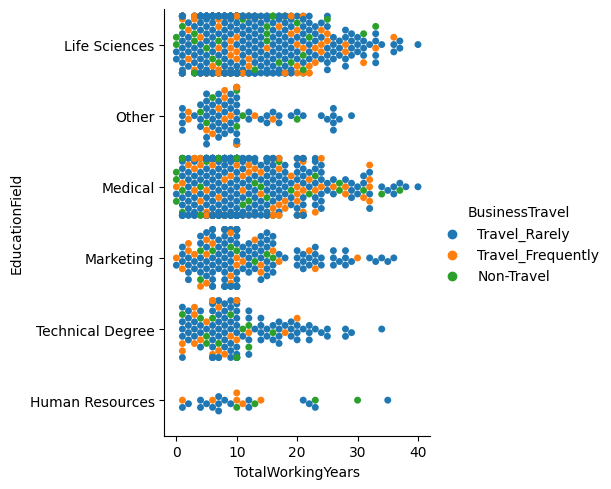

In [21]:
sns.catplot(data=hr, x='TotalWorkingYears', y='EducationField', hue='BusinessTravel', kind='swarm')

# Overtime vs Age

<Axes: xlabel='OverTime', ylabel='Age'>

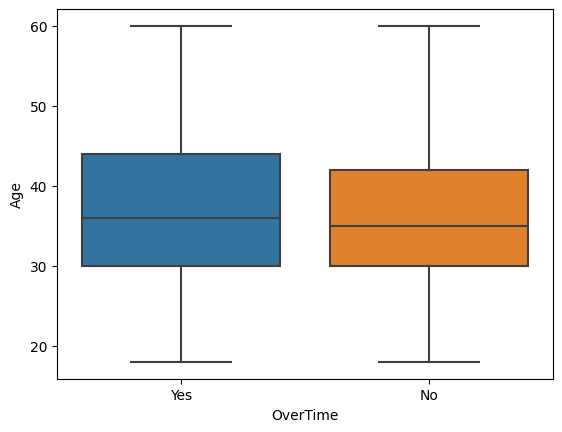

In [22]:
sns.boxplot(hr, x='OverTime', y='Age')

# Number Companies Worked vs Distance From Home (by Business Travel)

<Axes: xlabel='NumCompaniesWorked', ylabel='DistanceFromHome'>

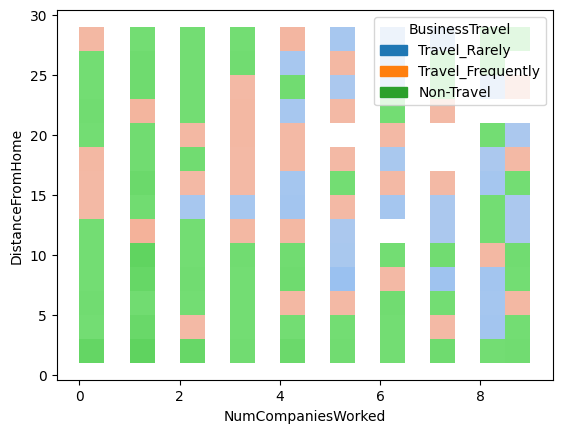

In [23]:
sns.histplot(data=hr, x='NumCompaniesWorked', y='DistanceFromHome', hue='BusinessTravel')

# Age Analysis (by Attrition)

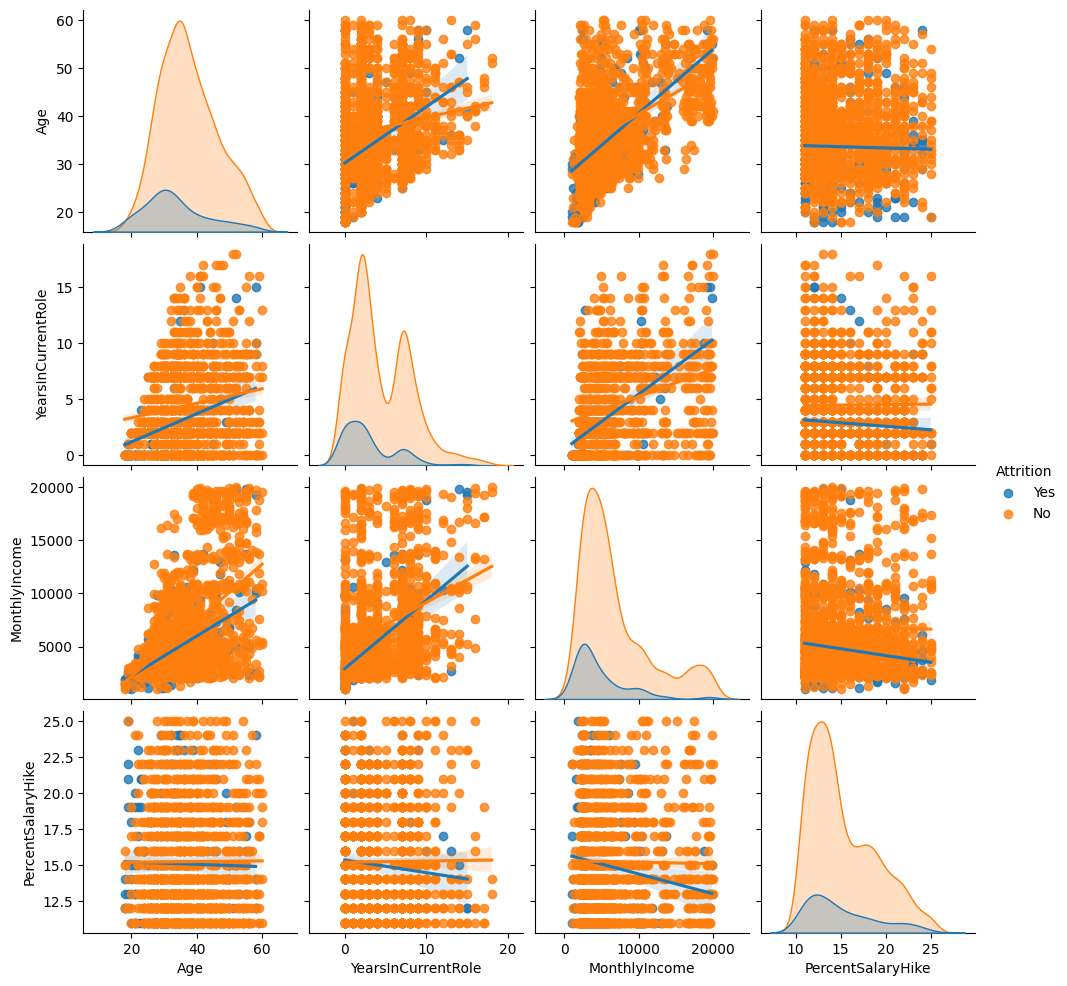

In [24]:
data1 = ['Age','Attrition','YearsInCurrentRole','MonthlyIncome','PercentSalaryHike']
sns.pairplot(hr[data1], kind='reg', diag_kind = 'kde' , hue = 'Attrition' )
plt.show()